In [55]:
from numpy.random import randint 
import numpy.random as rnd
import numpy as np
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt

In [56]:
# parameters

modelPath = ""
modelName = "NNMedian.keras"

n_arrays = 20_000
array_length = 4
max_digit = 10
epochs = 100
batch_size = 32
neurons = 2
stop_perc = 5

In [57]:
# calculate number of permutation 
#print("number of permutation: ", max_digit**array_length)
#print("percentage of view:", (n_arrays * 0.5) * 100 / max_digit**array_length, "%")

In [58]:
# generate input and output data
# give different max value 

input_arrays = []
label_arrays = []
for _ in range(n_arrays):
    temp_array = randint(0, randint(max_digit // 2, max_digit), array_length)
    temp_label = np.sort(temp_array)
    
    input_arrays.append(temp_array)
    label_arrays.append(temp_label)

In [59]:
print(len(input_arrays), len(label_arrays))
print(input_arrays[:3])
print(label_arrays[:3])

20000 20000
[array([5, 8, 1, 4]), array([5, 5, 7, 0]), array([0, 1, 7, 7])]
[array([1, 4, 5, 8]), array([0, 5, 5, 7]), array([0, 1, 7, 7])]


In [60]:
# normalize 

for i in range(len(input_arrays)):
    input_arrays[i] = input_arrays[i].astype("float32") / (max_digit - 1)
    label_arrays[i] = label_arrays[i].astype("float32") / (max_digit - 1)

In [61]:
# make np array 

input_arrays = np.array(input_arrays)
label_arrays = np.array(label_arrays)

In [62]:
# print(input_arrays[:1])
# print(label_arrays[:1])

In [63]:
# split data 

n_train = int(0.5 * n_arrays)
n_val = int(0.25 * n_arrays)
n_eval = n_arrays - n_train - n_val

data_test = input_arrays[:n_train]
data_validation = input_arrays[n_train:(n_train+n_val)]
data_evaluation = input_arrays[n_train + n_val:]

label_test = label_arrays[:n_train]
label_validation = label_arrays[n_train:(n_train+n_val)]
label_evaluation = label_arrays[n_train + n_val:]

In [64]:
print(data_test.shape, data_validation.shape, data_evaluation.shape)
print(label_test.shape, label_validation.shape, label_evaluation.shape)

(10000, 4) (5000, 4) (5000, 4)
(10000, 4) (5000, 4) (5000, 4)


In [65]:
inputs = keras.Input(shape=(array_length))
x = layers.Dense(neurons, activation="relu") (inputs)
x = layers.Dense(neurons, activation="relu") (x)
outputs = layers.Dense(array_length, activation="sigmoid") (x)

model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_6 (Dense)             (None, 2)                 10        
                                                                 
 dense_7 (Dense)             (None, 2)                 6         
                                                                 
 dense_8 (Dense)             (None, 4)                 12        
                                                                 
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


In [66]:
model.compile(
    optimizer="rmsprop", 
    loss="binary_crossentropy", 
    metrics=["mae"]
    )

In [67]:
callbacks = [ 
    keras.callbacks.ModelCheckpoint(
        filepath=modelPath + modelName, 
        monitor="val_mae", 
        save_best_only=True),
    keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=int(epochs/100*stop_perc))
    ]   

In [68]:
history = model.fit(
    data_test, 
    label_test, 
    epochs=epochs, 
    batch_size=batch_size,
    validation_data=(data_validation, label_validation),
    callbacks=callbacks
    )

Epoch 1/100
313/313 [==============================] - 6s 8ms/step - loss: 0.6491 - mae: 0.2131 - val_loss: 0.6109 - val_mae: 0.1803
Epoch 2/100
313/313 [==============================] - 3s 10ms/step - loss: 0.5836 - mae: 0.1554 - val_loss: 0.5648 - val_mae: 0.1346
Epoch 3/100
313/313 [==============================] - 2s 6ms/step - loss: 0.5582 - mae: 0.1287 - val_loss: 0.5558 - val_mae: 0.1245
Epoch 4/100
313/313 [==============================] - 1s 3ms/step - loss: 0.5489 - mae: 0.1189 - val_loss: 0.5445 - val_mae: 0.1123
Epoch 5/100
313/313 [==============================] - 1s 3ms/step - loss: 0.5361 - mae: 0.1038 - val_loss: 0.5311 - val_mae: 0.0951
Epoch 6/100
313/313 [==============================] - 1s 2ms/step - loss: 0.5241 - mae: 0.0870 - val_loss: 0.5215 - val_mae: 0.0806
Epoch 7/100
313/313 [==============================] - 1s 2ms/step - loss: 0.5181 - mae: 0.0777 - val_loss: 0.5187 - val_mae: 0.0760
Epoch 8/100
313/313 [==============================] - 1s 2ms/step -

In [69]:
mae = history.history["mae"]
val_mae = history.history["val_mae"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
x_epochs = range(1, len(val_mae) + 1)

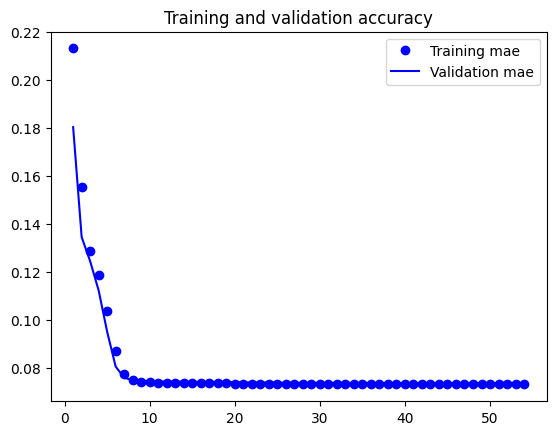

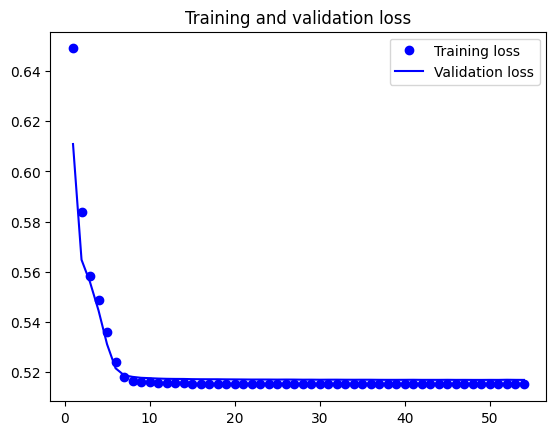

In [70]:
plt.plot(x_epochs, mae, "bo", label="Training mae")
plt.plot(x_epochs, val_mae, "b", label="Validation mae")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(x_epochs, loss, "bo", label="Training loss")
plt.plot(x_epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [71]:
model_best = keras.models.load_model(modelPath + modelName)

eval_loss, eval_mae = model_best.evaluate(data_evaluation, label_evaluation)
eval_mae_perc = eval_mae * (max_digit - 1)

print(f"Evaluation accuracy: {eval_mae:.3f}")
print(f"Evaluation mae denormalized: {eval_mae_perc:.2f}")

157/157 [==============================] - 0s 1ms/step - loss: 0.5133 - mae: 0.0734
Evaluation accuracy: 0.073
Evaluation mae denormalized: 0.66


In [72]:
def denormalize(x):
    x = x * (max_digit - 1)
    return x

def rounding(x):
    x = round(x, 0)
    return x

predictions = model_best.predict(data_evaluation)
targets = label_evaluation

157/157 [==============================] - 0s 1ms/step


In [73]:
# denormalize and round 

predictions_denorm = []
targets_denorm = []
for i in range(len(predictions)):
    temp_pred_denorm_array = []
    temp_targ_denorm_array = []
    for ii in range(array_length):
        temp_pred_denorm_array.append(rounding(denormalize(float(predictions[i][ii]))))
        temp_targ_denorm_array.append(rounding(denormalize(targets[i][ii])))
    predictions_denorm.append(temp_pred_denorm_array)
    targets_denorm.append(temp_targ_denorm_array)

print(len(predictions_denorm), len(targets_denorm))
print(predictions_denorm[:3])
print(targets_denorm[:3])

5000 5000
[[1.0, 3.0, 5.0, 6.0], [1.0, 3.0, 5.0, 6.0], [0.0, 1.0, 2.0, 4.0]]
[[2.0, 3.0, 5.0, 5.0], [2.0, 3.0, 5.0, 5.0], [0.0, 0.0, 2.0, 5.0]]


In [74]:
# plot the prediction and target by merging all the arrays 

index_x = 0
x_merged = []
pred_merged = []
targ_merged = []
for i in range(len(predictions_denorm)):
    for ii in range(array_length):
        index_x += 1
        x_merged.append(index_x)
        pred_merged.append(predictions_denorm[i][ii])
        targ_merged.append(targets_denorm[i][ii])

In [75]:
# calculate error that are elements out of place 

miss = 0
hit = 0
tot = len(pred_merged)
for i in range(len(pred_merged)):
    if (pred_merged[i] == targ_merged[i]):
        hit += 1
    else:
        miss += 1
perc = round(hit * 100 / tot, 1)

print(f"tot: {tot}, hit: {hit}, miss: {miss}, perc hit: {perc}%")

tot: 20000, hit: 9274, miss: 10726, perc hit: 46.4%


In [76]:
# calculate mean absolute error 
# need to calculate the maximum for every array as they are different 

def mean_absolute_error_array(pre_denorm, tar_denorm):
    N = len(pre_denorm)
    errors_array = []
    for i in range(N):
        temp_error = 0
        temp_sum = 0
        n = array_length
        for ii in range(n):
            temp_sum += abs(pre_denorm[i][ii] - tar_denorm[i][ii])
        temp_error = temp_sum / n
        errors_array.append(temp_error)
    return errors_array

def mean_absolute_error(mae_array):
    return np.mean(mae_array)

def mean_absolute_error_perc(mae_array, tar_denorm):
    # calcualte the max value 
    # take the target for the maximum 
    max_val_array = []
    for i in range(len(tar_denorm)):
        max_val_array.append(np.max(tar_denorm[i]))
    
    mae_perc_array = []
    for i in range(len(tar_denorm)):
        if max_val_array[i] != 0:
            mae_perc_array.append(mae_array[i] * 100 / max_val_array[i])
        else:
            mae_perc_array.append(mae_array[i] * 100)
    
    mae_perc = np.mean(mae_perc_array)
    
    return max_val_array, mae_perc_array, mae_perc

mae_array = mean_absolute_error_array(predictions_denorm, targets_denorm)
mae = mean_absolute_error(mae_array)
max_val_array, mae_perc_array, mae_perc = mean_absolute_error_perc(mae_array, targets_denorm)
mae_perc = round(mae_perc, 1)

# print(predictions_denorm[:3])
# print(targets_denorm[:3])
print(f"mean absolute error of every array: {mae_array[:3]}")
print(f"max value of every array: {max_val_array[:3]}")
print(f"mae perc of every array: {mae_perc_array[:3]}")
print()
print(f"mean absolute error: {mae}")
print(f"mean absolute error perc: {mae_perc}%")

mean absolute error of every array: [0.5, 0.5, 0.5]
max value of every array: [5.0, 5.0, 5.0]
mae perc of every array: [10.0, 10.0, 10.0]

mean absolute error: 0.6173
mean absolute error perc: 13.1%


In [77]:
print("array_length: ", array_length)
print(len(pred_merged), len(targ_merged))
print(pred_merged[:(2*array_length)])
print(targ_merged[:(2*array_length)])

array_length:  4
20000 20000
[1.0, 3.0, 5.0, 6.0, 1.0, 3.0, 5.0, 6.0]
[2.0, 3.0, 5.0, 5.0, 2.0, 3.0, 5.0, 5.0]


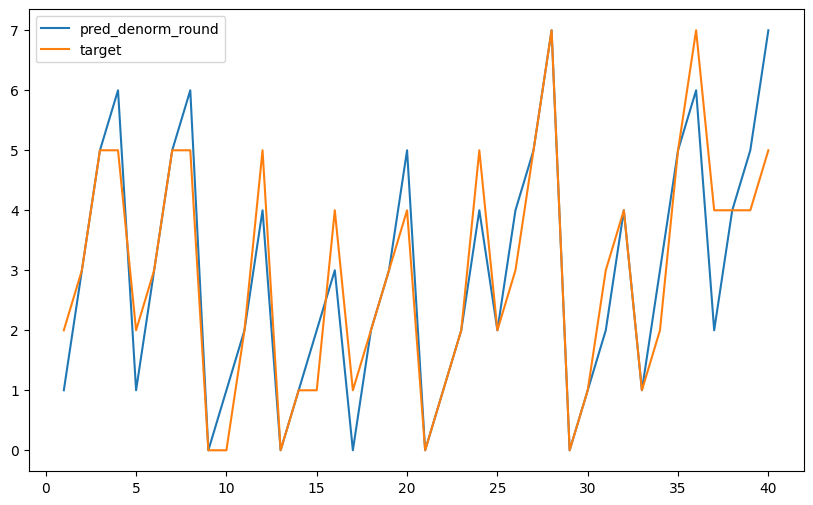

In [78]:
plot_length = array_length * 10

plt.figure(figsize=(10, 6))
plt.plot(x_merged[:plot_length], pred_merged[:plot_length], label="pred_denorm_round")
plt.plot(x_merged[:plot_length], targ_merged[:plot_length], label="target")
plt.legend(loc="upper left")
plt.show()

In [79]:
layer_weights_1 = model_best.layers[1].get_weights()[0]
layer_biases_1  = model_best.layers[1].get_weights()[1]
layer_weights_2 = model_best.layers[2].get_weights()[0]
layer_biases_2  = model_best.layers[2].get_weights()[1]
layer_weights_3 = model_best.layers[3].get_weights()[0]
layer_biases_3 = model_best.layers[3].get_weights()[1]

print(layer_weights_1)
print(layer_biases_1)
print()
print(layer_weights_2)
print(layer_biases_2)
print()
print(layer_weights_3)
print(layer_biases_3)

[[-0.5337669   0.41097623]
 [-0.5318435  -0.24539454]
 [-0.53426415 -0.27085727]
 [-0.53663737 -0.66646075]]
[ 1.3950504 -0.2946459]

[[-0.36048776  2.1646347 ]
 [-0.17411053 -0.22730859]]
[ 0.         -0.00268662]

[[-0.7351899  -0.8265331   0.9763236   0.44013047]
 [-1.524584   -1.3159754  -1.2064873  -1.0535822 ]]
[-0.25353494  0.7331413   1.3998443   1.8335527 ]


In [80]:
def pred_norm(xs):
    xs = xs.astype("float32") / (max_digit - 1)
    return xs

def pred_denorm(xs):
    xs = xs * (max_digit - 1)
    return xs

def pred_round(xs):
    for i in range(len(xs)):
        xs[i] = round(xs[i], 0)
    return xs

In [81]:
xs = [4, 2, 6, 9]
# xs = randint(0, randint(max_digit // 2, max_digit), array_length)

p_array = np.array([np.array(xs)])
p_array_sorted = np.sort(p_array)

# normalize before input 
predictions = model_best.predict(pred_norm(p_array))

opt_predictions = pred_round(pred_denorm(predictions[0]))

print(f"input: {p_array}")
print(f"target sorted: {p_array_sorted}")
print(f"prediction raw: {predictions}")
print(f"prediction opt: {opt_predictions}")

1/1 [==============================] - 0s 29ms/step
input: [[4 2 6 9]]
target sorted: [[2 4 6 9]]
prediction raw: [[0.32432443 0.5789453  0.7349046  0.8178045 ]]
prediction opt: [3. 5. 7. 7.]
